In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [195]:
class SVM:
    def train(self, train, label, epoch, alpha):
        feature_size = len(train[0]) 
        data_size = len(train)
        lambda_v = 1/epoch
        
        self.weight = np.ones(feature_size)
        
        
        for e in range(epoch):
            
            sum = 0
            for x in train:
                sum += max(0,1-np.dot(x,self.weight))
            loss = lambda_v*np.linalg.norm(self.weight)**2 + sum
            
            print("Epoch {}/{}: Loss is {}".format(e+1,epoch,loss))
            
            for i in range(data_size):
                p = label[i] * np.dot(train[i],self.weight) 
    
                if p >= 0: #prediction is correct
                    self.weight = self.weight - alpha*(2*lambda_v*self.weight)
                else:
                    self.weight = self.weight + alpha*(label[i]*train[i] - 2*lambda_v*self.weight)
                
    def predict(self,test):
        
        res = []
        
        for t in test:
            res.append(np.dot(t,self.weight))
        
        return res
        
        
                
        

In [78]:
df = pd.read_csv('iris.csv')

sepalLength = df['SepalLengthCm'][:100].values
sepalWidth = df['SepalWidthCm'][:100].values
species = df['Species'][:100].values

feature = []
for i in range(100):
    temp = []
    temp = [sepalLength[i]] + [sepalWidth[i]]
    feature.append(temp)

#Iris-setosa is 1   Iris-versicolor is -1
label = [1]*50 + [-1]*50


#shuffle
feature, label = shuffle(feature,label)
#split dataset into 90% for training and 10% validation
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.1)

feature_train = np.array(feature_train)
label_train = np.array(label_train)

feature_test = np.array(feature_test)
label_test = np.array(label_test)

In [208]:
a = 0.0001
epoch = 300
svm = SVM()
svm.train(feature_train, label_train,epoch, a)

res = svm.predict(feature_test)
count = 0

for i in range(len(label_test)):
    if(label_test[i] * res[i] >0):
        count += 1
print(count/len(label_test))

Epoch 1/300: Loss is 0.006666666666666669
Epoch 2/300: Loss is 0.006418220485643082
Epoch 3/300: Loss is 0.006175148728211029
Epoch 4/300: Loss is 0.005937450428810956
Epoch 5/300: Loss is 0.005705124622018419
Epoch 6/300: Loss is 0.005478170342544049
Epoch 7/300: Loss is 0.005256586625233543
Epoch 8/300: Loss is 0.005040372505067649
Epoch 9/300: Loss is 0.0048295270171621425
Epoch 10/300: Loss is 0.004624049196767816
Epoch 11/300: Loss is 0.004423938079270458
Epoch 12/300: Loss is 0.004229192700190822
Epoch 13/300: Loss is 0.004039812095184637
Epoch 14/300: Loss is 0.003855795300042576
Epoch 15/300: Loss is 0.0036771413506902248
Epoch 16/300: Loss is 0.003503849283188089
Epoch 17/300: Loss is 0.0033359181337315673
Epoch 18/300: Loss is 0.0031733469386509196
Epoch 19/300: Loss is 0.0030161347344112785
Epoch 20/300: Loss is 0.002864280557612599
Epoch 21/300: Loss is 0.0027177834449896776
Epoch 22/300: Loss is 0.002576642433412098
Epoch 23/300: Loss is 0.002440856559884244
Epoch 24/300: 

In [209]:
svm.weight

array([-0.23268284,  0.4095968 ])

In [197]:
res

[4.891790253510344,
 5.468699321138045,
 4.906061373475087,
 4.7626523379483015,
 4.817161728166067,
 5.290900030520004,
 5.536192286499949,
 4.322016745865014,
 4.7626523379483015,
 4.797042593039556]

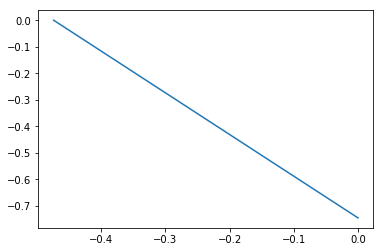

In [202]:
w = svm.weight

plt.plot([0,-1*w[0]],[-1*w[1],0])
plt.show()
                      

In [201]:
w

array([0.4737383 , 0.74628525])